In [1]:
import os
import sys
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


%matplotlib inline

In [4]:
#os.listdir("../../")
sys.path.append("../../")

# Statistical Network Models



Let $V=\{\theta_{1},\cdots,\theta_{2},\}$ be a countably infinite set of nodes with $\theta_i \in \mathbb{R}_{+}$. We represent the directed multigraph of interest  using an atomic measure on $\mathbb{R}^2_{+}$

\begin{equation}
 D = \sum^{\infty}_{i=1}\sum^{\infty}_{j=1}n_{ij}\delta_{(\theta_i,\theta_j)}
\end{equation}

Where $n_{ij}$ counts the number of directed edges from node $\theta_i$ to node $\theta_j$.  Our generative approach for modeling $D$ associates with each node $\theta_i$ a sociability parameter $w_i > 0$ defined via the atomic random measure

\begin{equation}
 W = \sum^{\infty}_{i=1} w_{i}\delta_{\theta_i}
\end{equation}

Which we take to be distributed according to a homogeneous CRM, $W \sim CRM(\rho,\lambda)$. Given $W$, $D$ is simply generated from a Poisson process (PP) with intensity given by the product measure $\tilde{W} = W \times W$. The generalized gamma process (GGP) is a flexible two parameter CRM, with interpretable parameters and remarkable conjugagy properties. The L\'evy intensity of the GGP is given by:

\begin{equation}
 \rho(dw) = \frac{1}{\Gamma(1-\sigma)}w^{-1 - \sigma}\exp(-\tau w)dw
\end{equation}

where the two parameters verify 
\begin{equation}
 (\sigma,\tau) \in (-\infty,0]\times(0,+\infty) \text{ or }  (\sigma,\tau) \in  (0,1) \times [0,+\infty)
\end{equation}


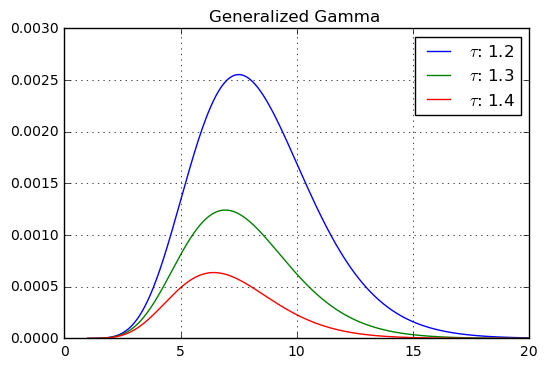

In [66]:
from scipy.special import gamma

def GG_Intensity(w,*parameters):
    sigma = parameters[0] #(corresponds to \alpha in BFRY)
    tau = parameters[1]
    return (1./gamma(1.-sigma))*(w**(-(1+sigma)))*np.exp(-tau*w)


W = np.linspace(1.,20,1000)
sigma=-10.
tau = 10.
plt.title("Generalized Gamma ")
for tau_k in [1.2,1.3,1.4]:
    GI = GG_Intensity(W,sigma,tau_k)
    plt.plot(W,GI,label=r"$\tau$: {0}".format(tau_k))
plt.grid(True)
plt.legend(loc="best")

# Graph Restrictions

$$
W_{\alpha} \sim \text{CRM}(\rho,\lambda_\alpha)
$$

$$
D^{*}_{\alpha}|W^{*}_{\alpha} \sim \text{Poisson}(W^{*2}_{\alpha})
$$

For $k=1,...,D^{*}_{\alpha}$ and $j=1,2$

$$
U_{kj}|W_{\alpha} \sim \frac{W_{\alpha}}{W^*_{\alpha}}
$$

$$
D_{\alpha} = \sum^{D^*_{\alpha}}_{k=1} \delta(U_{k1},U_{k2})
$$

# BFRY

$\text{BRS}(c,\tau,\sigma) = \frac{\sigma s^{- \sigma - 1} \left(- s e^{- \left(\frac{\sigma}{c}\right)^{\frac{1}{\sigma}}} + 1\right) e^{- \tau \theta}}{\left(- \tau^{\sigma} + \left(\tau + \left(\frac{\sigma}{c}\right)^{\frac{1}{\sigma}}\right)^{\sigma}\right) \Gamma{\left (- \sigma + 1 \right )}}$

In [6]:
#SYMPY REFERENCE https://minireference.com/static/tutorials/sympy_tutorial.pdf
    
from sympy import *
from sympy.interactive import printing
import sympy
from sympy import Eq
import sympy as sym
from sympy.abc import theta, phi, alpha, tau
from __future__ import division
from scipy.stats import pareto
from random import randint
from sympy import Symbol
#from mpmath import *

printing.init_printing(use_latex='mathjax')


K = 3 #Number of communities
nk = symbols("n_0:"+str(K),integer=True) 
K = Symbol("K",integer=True)
pk = Symbol("p",real=True)
lamb = Symbol("\\lambda",function=True)
theta = Symbol("\\theta")
F = symbols("\Gamma_0:"+str(K),function=True)
G = Symbol("\Gamma",function=True)
alpha = Symbol("\\alpha",function=True)
Alphas =  symbols("\\alpha_0:"+str(K))
x, y, z, w, s, c, u, a, b  = symbols("x y z w s c u a b")
sig = Symbol("\sigma")
E = [Symbol("\Gamma_{\\alpha_"+str(i)+"}",function=True)(x) for i in range(10)]
k, n = symbols("k n", integer=True)
t = symbols("t",real=True)
P = symbols("P",function=True)
p = Symbol("p",function=True)

In [7]:
#==========================
# GRAPH VARIABLES
#==========================
Da = Symbol("D^{*}_{\\alpha}")
Da

#==========================
# Densities variables
#==========================
Indicator = Symbol("\\mathbb{1}")
Indicator_tilted = Symbol("\\mathbb{1}_{\{ \\tau + (\\frac{\\alpha}{c})^{\\frac{1}{\\alpha}} \leq t \leq \\tau^{-1} \}}")

In [8]:
((alpha*(t**(-alpha-1))*Indicator_tilted)/((tau+(alpha/c)**(1/alpha))**alpha - tau**alpha))

                                                                              
\alpha⋅\mathbb{1}_{\{ \tau + (\frac{\alpha}{c})__{\frac{1}{\alpha}} \leq t \le
──────────────────────────────────────────────────────────────────────────────
                                                                    \alpha    
                                              ⎛            ________⎞          
                                     \alpha   ⎜           ╱ \alpha ⎟          
                                  - τ       + ⎜τ + \alpha╱  ────── ⎟          
                                              ⎝        ╲╱     c    ⎠          

                  -\alpha - 1
q \tau__{-1} \}}⋅t           
─────────────────────────────
                             
                             
                             
                             
                             

In [9]:
tilted_no_indicator = ((alpha*(t**(-alpha-1)))/((tau+(alpha/c)**(1/alpha))**alpha - tau**alpha))

In [10]:
tilted_no_indicator

                  -\alpha - 1           
          \alpha⋅t                      
────────────────────────────────────────
                                  \alpha
            ⎛            ________⎞      
   \alpha   ⎜           ╱ \alpha ⎟      
- τ       + ⎜τ + \alpha╱  ────── ⎟      
            ⎝        ╲╱     c    ⎠      

In [19]:
eq = Eq(tilted_no_indicator,y)

In [20]:
tilted_no_indicator_integrated = integrate(tilted_no_indicator,(t,x,b))
tilted_no_indicator_integrated

       ⎛⎧  log(b)    for -\alpha - 1 = -1⎞          ⎛⎧  log(x)    for -\alpha 
       ⎜⎪                                ⎟          ⎜⎪                        
       ⎜⎪  -\alpha                       ⎟          ⎜⎪  -\alpha               
\alpha⋅⎜⎨-b                              ⎟   \alpha⋅⎜⎨-x                      
       ⎜⎪──────────       otherwise      ⎟          ⎜⎪──────────       otherwi
       ⎜⎪  \alpha                        ⎟          ⎜⎪  \alpha                
       ⎝⎩                                ⎠          ⎝⎩                        
────────────────────────────────────────── - ─────────────────────────────────
                                   \alpha                                     
             ⎛            ________⎞                       ⎛            _______
    \alpha   ⎜           ╱ \alpha ⎟              \alpha   ⎜           ╱ \alpha
 - τ       + ⎜τ + \alpha╱  ────── ⎟           - τ       + ⎜τ + \alpha╱  ──────
             ⎝        ╲╱     c    ⎠                 

In [21]:
tilted_no_indicator_integrated.args[0].args[-1].args[1][0]

  -\alpha 
-b        
──────────
  \alpha  

In [22]:
solve(eq,t)

⎡                                                 -1     ⎤
⎢                                              ──────────⎥
⎢                                              \alpha + 1⎥
⎢⎛  ⎛                                  \alpha⎞⎞          ⎥
⎢⎜  ⎜            ⎛            ________⎞      ⎟⎟          ⎥
⎢⎜  ⎜   \alpha   ⎜           ╱ \alpha ⎟      ⎟⎟          ⎥
⎢⎜y⋅⎜- τ       + ⎜τ + \alpha╱  ────── ⎟      ⎟⎟          ⎥
⎢⎜  ⎝            ⎝        ╲╱     c    ⎠      ⎠⎟          ⎥
⎢⎜────────────────────────────────────────────⎟          ⎥
⎣⎝                   \alpha                   ⎠          ⎦

# BFRY Densities

In [23]:
N = (alpha*s**(-alpha-1)*(exp(-tau*s))*(1-exp(-(alpha/c)**(1/alpha))*s))
D = G(1-alpha)*((tau+(alpha/c)**(1/alpha))**alpha - tau**alpha)
bfry_density = (N/D)

In [24]:
bfry_density.subs(alpha,sig)

                        ⎛              ________    ⎞          
                        ⎜             ╱ \sigma     ⎟          
                        ⎜     -\sigma╱  ──────     ⎟          
            -\sigma - 1 ⎜          ╲╱     c        ⎟  -s⋅τ    
    \sigma⋅s           ⋅⎝- s⋅ℯ                  + 1⎠⋅ℯ        
──────────────────────────────────────────────────────────────
⎛                                  \sigma⎞                    
⎜            ⎛            ________⎞      ⎟                    
⎜   \sigma   ⎜           ╱ \sigma ⎟      ⎟                    
⎜- τ       + ⎜τ + \sigma╱  ────── ⎟      ⎟⋅\Gamma(-\sigma + 1)
⎝            ⎝        ╲╱     c    ⎠      ⎠                    

In [70]:
bfry_density_function = Symbol("g_{1/K,\sigma}",function=True)
bfry_density_function

g_{1/K,\sigma}

# Dirichlet

In [71]:
dirichlet = (G(n+1)/Product(G(n(k)+1),(k,1,K)))*Product(pk(k)**n(k),(k,1,K))

In [76]:
dirichlet.subs(K,3).subs(p(k),w(k))

                3            
              ┬────┬         
              │    │  n(k)   
\Gamma(n + 1)⋅│    │ w    (k)
              │    │         
              k = 1          
─────────────────────────────
      3                      
    ┬───┬                    
    │   │ \Gamma(n(k) + 1)   
    │   │                    
    k = 1                    

# Joint Model Likehood

In [77]:
probability_of_fnrm = Product(bfry_density_function(w(k))*lamb(theta(k))*exp(-u*w(k)),(k,1,K))
probability_of_fnrm = u**(Da-1)*probability_of_fnrm
probability_of_fnrm

                       K                                                    
                     ┬────┬                                                 
 D_{\alpha}__{*} - 1 │    │                                          -u⋅w(k)
u                   ⋅│    │ \lambda(\theta(k))⋅g_{1/K,\sigma}(w(k))⋅ℯ       
                     │    │                                                 
                     k = 1                                                  

In [78]:
join_model = probability_of_fnrm*dirichlet.subs(p(k),w(k))
join_model

                                   ⎛  K                                       
                                   ⎜┬────┬                                    
 D_{\alpha}__{*} - 1               ⎜│    │                                    
u                   ⋅\Gamma(n + 1)⋅⎜│    │ \lambda(\theta(k))⋅g_{1/K,\sigma}(w
                                   ⎜│    │                                    
                                   ⎝k = 1                                     
──────────────────────────────────────────────────────────────────────────────
                                             K                                
                                           ┬───┬                              
                                           │   │ \Gamma(n(k) + 1)             
                                           │   │                              
                                           k = 1                              

             ⎞   K            
             ⎟ ┬────

In [81]:
expand_log(log(dirichlet.subs(K,3).doit()),force=True)

n(1)⋅log(p(1)) + n(2)⋅log(p(2)) + n(3)⋅log(p(3)) + log(\Gamma(n + 1)) - log(\G
amma(n(1) + 1)) - log(\Gamma(n(2) + 1)) - log(\Gamma(n(3) + 1))

In [111]:
log_dirichlet = expand_log(log(dirichlet.subs(K,3).doit()),force=True)
backToSubIndice(backToSubIndice(log_dirichlet,p,(1,4)),x,(1,4))

x₁⋅log(p₁) + x₂⋅log(p₂) + x₃⋅log(p₃) + log(\Gamma(n + 1)) - log(\Gamma(x₁ + 1)
) - log(\Gamma(x₂ + 1)) - log(\Gamma(x₃ + 1))

In [103]:
def subsParentesis(expresion,p,w,krange):
    for k in range(*krange):
        expresion = expresion.subs(p(k),w(k))
    return expresion

def backToSubIndice(expresion,p,krange):
    for k in range(*krange):
        expresion = expresion.subs(p(k),Symbol(str(p)+"_{0}".format(k)))
    return expresion

def backToSuperIndice(expresion,p,krange):
    for k in range(*krange):
        expresion = expresion.subs(p(k),Symbol(str(p)+"^{0}".format(k)))
    return expresion